In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Baffin = pd.read_excel(filepath, sheet_name='Baffin-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Baffin)
fp.date_time(Baffin)

,Extent,Date
0,1090625.815,1979-01-01
1,1157634.866,1979-02-01
2,1299583.477,1979-03-01
3,1137194.680,1979-04-01
4,983083.453,1979-05-01
...,...,...
533,781460.891,2023-06-01
534,331845.048,2023-07-01
535,99334.625,2023-08-01
536,49359.723,2023-09-01


In [5]:
scaler = MinMaxScaler()
Baffin['Extent'] = scaler.fit_transform(Baffin['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 5
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Baffin['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((522, 12, 1), (522,))

In [8]:
X_train, y_train = X[:419], y[:419]
X_val, y_val = X[419:471], y[419:471]
X_test, y_test = X[471:], y[471:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Baffin_model_LT5/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
50/53 [===========================>..] - ETA: 0s - loss: 0.2443 - root_mean_squared_error: 0.4943

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 9s 106ms/step - loss: 0.2456 - root_mean_squared_error: 0.4956 - val_loss: 0.2133 - val_root_mean_squared_error: 0.4619
Epoch 2/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1771 - root_mean_squared_error: 0.4208

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 3s 58ms/step - loss: 0.1787 - root_mean_squared_error: 0.4227 - val_loss: 0.1783 - val_root_mean_squared_error: 0.4222
Epoch 3/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1424 - root_mean_squared_error: 0.3774

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.1406 - root_mean_squared_error: 0.3750 - val_loss: 0.1523 - val_root_mean_squared_error: 0.3903
Epoch 4/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1153 - root_mean_squared_error: 0.3395

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.1160 - root_mean_squared_error: 0.3405 - val_loss: 0.1264 - val_root_mean_squared_error: 0.3555
Epoch 5/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0936 - root_mean_squared_error: 0.3060

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0927 - root_mean_squared_error: 0.3045 - val_loss: 0.1050 - val_root_mean_squared_error: 0.3240
Epoch 6/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0754 - root_mean_squared_error: 0.2747

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0757 - root_mean_squared_error: 0.2751 - val_loss: 0.0866 - val_root_mean_squared_error: 0.2943
Epoch 7/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0627 - root_mean_squared_error: 0.2503

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 104ms/step - loss: 0.0637 - root_mean_squared_error: 0.2524 - val_loss: 0.0739 - val_root_mean_squared_error: 0.2718
Epoch 8/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0474 - root_mean_squared_error: 0.2178

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0517 - root_mean_squared_error: 0.2274 - val_loss: 0.0584 - val_root_mean_squared_error: 0.2416
Epoch 9/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0396 - root_mean_squared_error: 0.1990

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 104ms/step - loss: 0.0404 - root_mean_squared_error: 0.2009 - val_loss: 0.0477 - val_root_mean_squared_error: 0.2185
Epoch 10/50
52/53 [============================>.] - ETA: 0s - loss: 0.0333 - root_mean_squared_error: 0.1825

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0336 - root_mean_squared_error: 0.1833 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1891
Epoch 11/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0257 - root_mean_squared_error: 0.1604

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0268 - root_mean_squared_error: 0.1636 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1541
Epoch 12/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0244 - root_mean_squared_error: 0.1562

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0226 - root_mean_squared_error: 0.1502 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1259
Epoch 13/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0201 - root_mean_squared_error: 0.1416

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.0185 - root_mean_squared_error: 0.1358 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1017
Epoch 14/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0187 - root_mean_squared_error: 0.1368

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 97ms/step - loss: 0.0180 - root_mean_squared_error: 0.1343 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0902
Epoch 15/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0177 - root_mean_squared_error: 0.1329 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0972
Epoch 16/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.1188

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.0140 - root_mean_squared_error: 0.1182 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0784
Epoch 17/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0139 - root_mean_squared_error: 0.1178

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0133 - root_mean_squared_error: 0.1154 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0614
Epoch 18/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0164 - root_mean_squared_error: 0.1279 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0726
Epoch 19/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0180 - root_mean_squared_error: 0.1341 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0679
Epoch 20/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0165 - root_mean_squared_error: 0.1286

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0186 - root_mean_squared_error: 0.1364 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0587
Epoch 21/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0157 - root_mean_squared_error: 0.1254 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0633
Epoch 22/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0155 - root_mean_squared_error: 0.1245 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0602
Epoch 23/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0146 - root_mean_squared_error: 0.1207 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0630
Epoch 24/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0144 - root_mean_squared_error: 0.1201 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0866
Epoch 25/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1133

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.0139 - root_mean_squared_error: 0.1180 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0577
Epoch 26/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0164 - root_mean_squared_error: 0.1281 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0683
Epoch 27/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0146 - root_mean_squared_error: 0.1209 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0588
Epoch 28/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0151 - root_mean_squared_error: 0.1230 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0694
Epoch 29/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0174 - root_mean_squared_error: 0.1318 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0583
Epoch 30/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0158 - root_mean_squared_error: 0.1256

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0151 - root_mean_squared_error: 0.1227 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0570
Epoch 31/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0145 - root_mean_squared_error: 0.1203 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0575
Epoch 32/50
53/53 [==============================] - ETA: 0s - loss: 0.0124 - root_mean_squared_error: 0.1115

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0124 - root_mean_squared_error: 0.1115 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0569
Epoch 33/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0126 - root_mean_squared_error: 0.1121 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0582
Epoch 34/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0139 - root_mean_squared_error: 0.1180

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.0133 - root_mean_squared_error: 0.1154 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0558
Epoch 35/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0183 - root_mean_squared_error: 0.1352 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0739
Epoch 36/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0143 - root_mean_squared_error: 0.1195 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0677
Epoch 37/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0145 - root_mean_squared_error: 0.1203 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0682
Epoch 38/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0110 - root_mean_squared_error: 0.1047 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0593
Epoch 39/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0160 - root_mean_squared_error: 0.1267 - val_loss: 0.0038 - val_root_mean_square

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0159 - root_mean_squared_error: 0.1259 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0556
Epoch 42/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0170 - root_mean_squared_error: 0.1305 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0610
Epoch 43/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0194 - root_mean_squared_error: 0.1394

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 103ms/step - loss: 0.0182 - root_mean_squared_error: 0.1349 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0556
Epoch 44/50
53/53 [==============================] - ETA: 0s - loss: 0.0118 - root_mean_squared_error: 0.1085

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0118 - root_mean_squared_error: 0.1085 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0547
Epoch 45/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0130 - root_mean_squared_error: 0.1142 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0553
Epoch 46/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0154 - root_mean_squared_error: 0.1242 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0637
Epoch 47/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0162 - root_mean_squared_error: 0.1272 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0798
Epoch 48/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1121

INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


INFO:tensorflow:Assets written to: Baffin_model_LT5\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0121 - root_mean_squared_error: 0.1098 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0546
Epoch 49/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0167 - root_mean_squared_error: 0.1293 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0547
Epoch 50/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0130 - root_mean_squared_error: 0.1142 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0582


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

2.2010851899782815 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

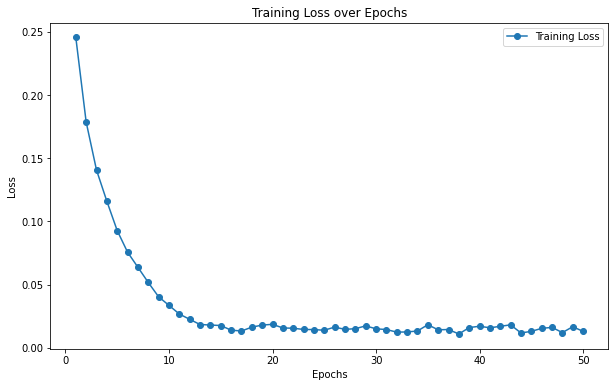

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

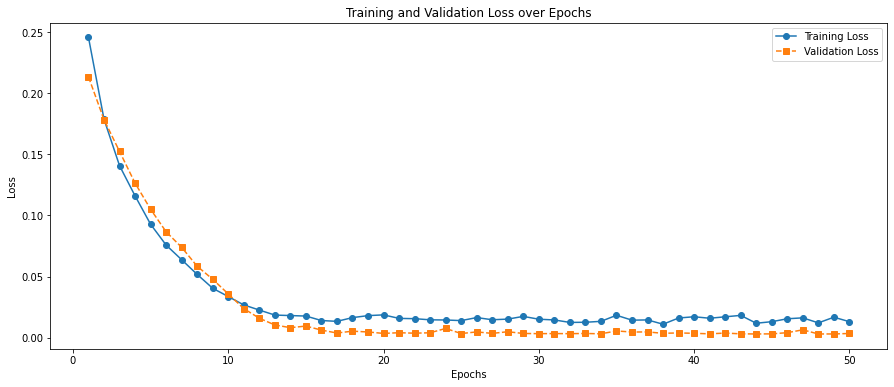

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Baffin_model_LT5/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 13ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

RMSE : 0.0675273549745013


In [19]:
mae = mean_absolute_error(y_test, test_predictions)
print(mae)

0.056916364734711504


In [20]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

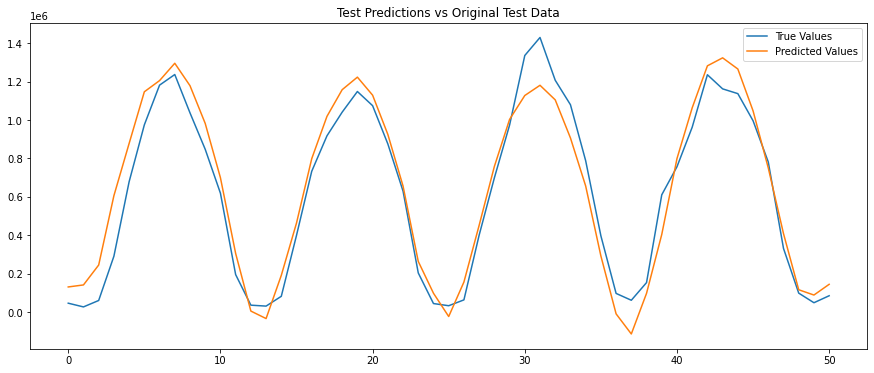

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

Prediction on whole dataset

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
mse = mean_squared_error(y, predictions)
print(mse)

0.004472570978957887


In [24]:
mae = mean_absolute_error(y, predictions)
print(mae)

0.0526378707969543


In [25]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

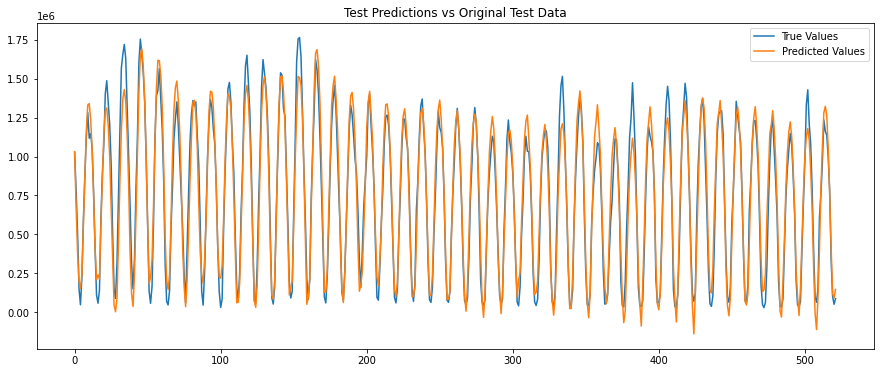

In [26]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()